In [2]:
import tarfile

# the download leaves us with a tar.gz file, we unzip it
tar = tarfile.open('sift.tar.gz', "r:gz")
tar.extractall()

In [3]:
import numpy as np

# now define a function to read the fvecs file format of Sift1M dataset
def read_fvecs(fp):
    a = np.fromfile(fp, dtype='int32')
    d = a[0]
    return a.reshape(-1, d + 1)[:, 1:].copy().view('float32')

In [10]:
# data we will search through
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
# also get some query vectors to search with
xq = read_fvecs('./sift/sift_query.fvecs')
# take just one query (there are many in sift_learn.fvecs)
xq = xq[:50].reshape(50, xq.shape[1])
#xq = xq[:2].reshape(1, -1)


In [11]:

wb.shape


(1000000, 128)

In [152]:
# 1.FLAT index 
import faiss
d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return

index = faiss.IndexFlatIP(d)
index.add(wb)

%time D, I = index.search(xq, k)


CPU times: total: 719 ms
Wall time: 150 ms


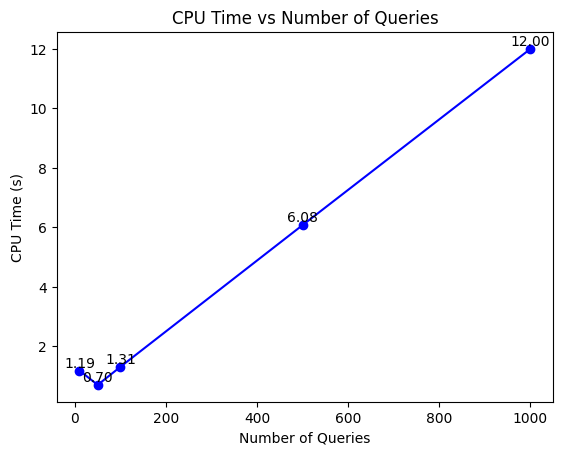

In [153]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return

index = faiss.IndexFlatIP(d)
index.add(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
cpu_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])
    
    start_time = time.process_time()
    D, I = index.search(xq_subset, k)
    elapsed_time = time.process_time() - start_time
    
    cpu_times.append(elapsed_time)

plt.plot(num_queries, cpu_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('CPU Time (s)')
plt.title('CPU Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, cpu_times):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


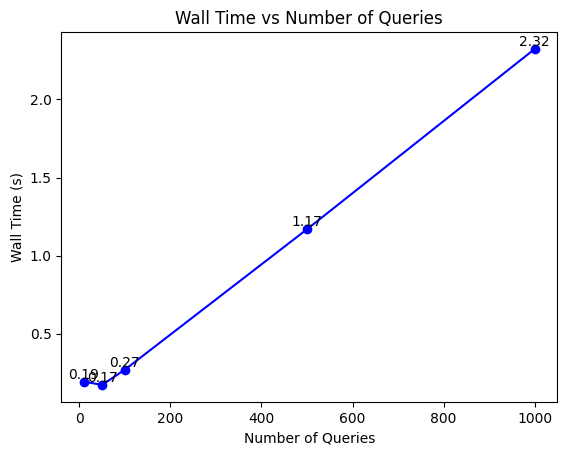

In [145]:
#FlatIndex Walltimes
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return

index = faiss.IndexFlatIP(d)
index.add(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
wall_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])
    
    start_time = time.time()
    D, I = index.search(xq_subset, k)
    elapsed_time = time.time() - start_time
    
    wall_times.append(elapsed_time)

plt.plot(num_queries, wall_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Wall Time (s)')
plt.title('Wall Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, wall_times):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


In [100]:
baseline = I[0]
baseline


array([932085, 934876, 561813, 708177, 706771, 695756, 435345, 701258,
       872728, 455537], dtype=int64)

In [112]:
# 2. LSH
nbits = d*4

index = faiss.IndexLSH(d,nbits)
index.add(wb)
%time D, I = index.search(xq, k)


CPU times: total: 13.5 s
Wall time: 1.95 s


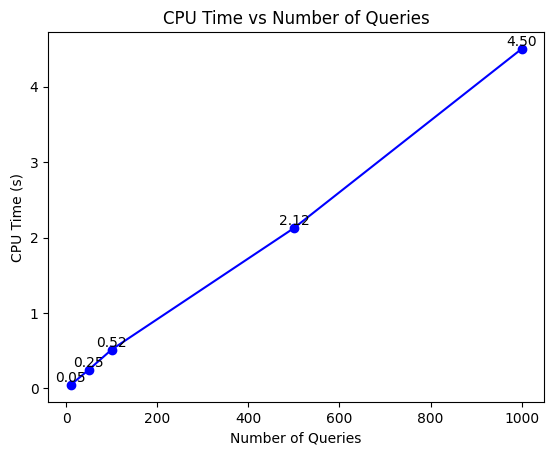

In [144]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nbits = d * 2

index = faiss.IndexLSH(d, nbits)
index.add(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
cpu_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])
    
    start_time = time.process_time()
    D, I = index.search(xq_subset, k)
    elapsed_time = time.process_time() - start_time
    
    cpu_times.append(elapsed_time)

plt.plot(num_queries, cpu_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('CPU Time (s)')
plt.title('CPU Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, cpu_times):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


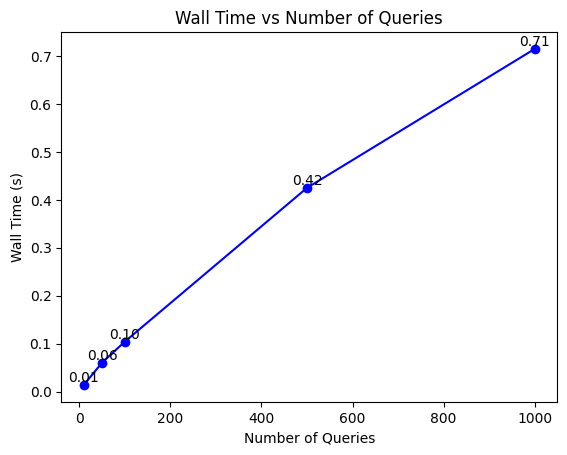

In [147]:
#LSH walltime
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nbits = d * 2

index = faiss.IndexLSH(d, nbits)
index.add(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
wall_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])
    
    start_time = time.time()
    D, I = index.search(xq_subset, k)
    elapsed_time = time.time() - start_time
    
    wall_times.append(elapsed_time)

plt.plot(num_queries, wall_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Wall Time (s)')
plt.title('Wall Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, wall_times):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


In [67]:
np.in1d(baseline,I)


array([ True,  True,  True,  True, False, False,  True, False, False,
        True])

In [117]:
#3. HNSW
M = 16
ef_search = 8
ef_construction = 64

In [118]:

index = faiss.IndexHNSWFlat(d, M)

index.hnsw.efSearch = ef_search
index.hnsw.efConstruction = ef_construction

index.add(wb)

%time D, I = index.search(xq, k)


CPU times: total: 0 ns
Wall time: 3.99 ms


In [71]:
np.in1d(baseline,I)

CPU times: total: 0 ns
Wall time: 1.99 ms


array([False, False,  True,  True,  True, False, False,  True, False,
       False])

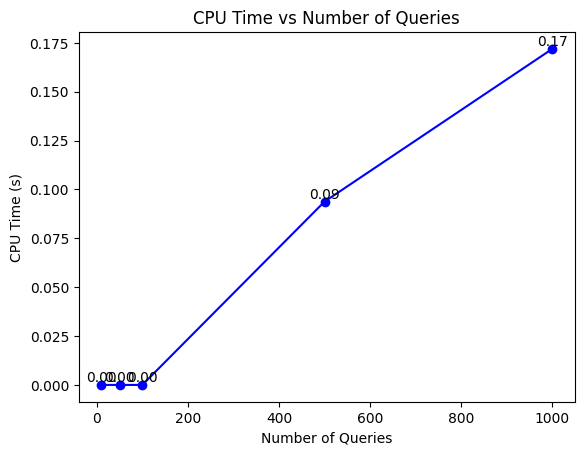

In [119]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
M = 16
ef_search = 8
ef_construction = 64

index = faiss.IndexHNSWFlat(d, M)
index.hnsw.efSearch = ef_search
index.hnsw.efConstruction = ef_construction

index.add(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
cpu_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])
    
    start_time = time.process_time()
    D, I = index.search(xq_subset, k)
    elapsed_time = time.process_time() - start_time
    
    cpu_times.append(elapsed_time)

plt.plot(num_queries, cpu_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('CPU Time (s)')
plt.title('CPU Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, cpu_times):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


Number of Queries: 10, Wall Time: 0.0020 seconds
Number of Queries: 50, Wall Time: 0.0020 seconds
Number of Queries: 100, Wall Time: 0.0015 seconds
Number of Queries: 500, Wall Time: 0.0090 seconds
Number of Queries: 1000, Wall Time: 0.0210 seconds


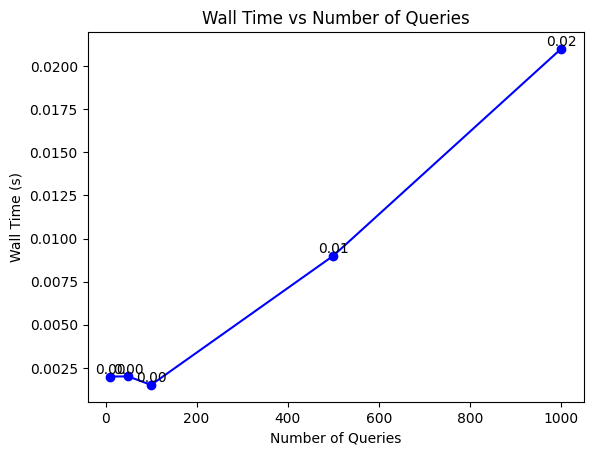

In [46]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]

xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
M = 16
ef_search = 64
ef_construction = 64

index = faiss.IndexHNSWFlat(d, M)
index.hnsw.efSearch = ef_search
index.hnsw.efConstruction = ef_construction

index.add(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
search_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])
    
    start_time = time.time()
    D, I = index.search(xq_subset, k)
    elapsed_time = time.time() - start_time
    
    search_times.append(elapsed_time)
    print(f"Number of Queries: {num_query}, Wall Time: {elapsed_time:.4f} seconds")

plt.plot(num_queries, search_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Wall Time (s)')
plt.title('Wall Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, search_times):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


Number of Queries  |  Queries per Second
----------------------------------------
               10  |  3421.64
               50  |  913.44
              100  |  446.58
              500  |  79.94
             1000  |  46.52


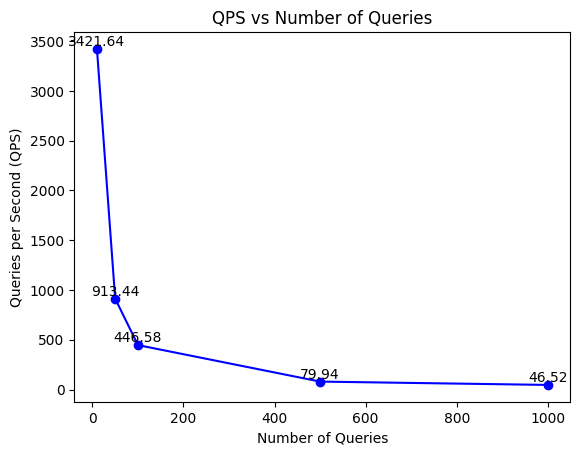

In [48]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
M = 16
ef_search = 64

index = faiss.IndexHNSWFlat(d, M)
index.hnsw.efSearch = ef_search

index.add(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
qps_list = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    query_count = 0

    while time.time() - start_time < 1.0:  # Measure QPS for 1 second
        D, I = index.search(xq_subset, k)
        query_count += 1

    qps = query_count / (time.time() - start_time)
    qps_list.append(qps)

# Display the table
print("Number of Queries  |  Queries per Second")
print("----------------------------------------")
for num_query, qps in zip(num_queries, qps_list):
    print(f"{num_query:17d}  |  {qps:.2f}")

# Plot the QPS values
plt.plot(num_queries, qps_list, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Queries per Second (QPS)')
plt.title('QPS vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, qps_list):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


Number of Queries  |  Build Time (s)
-------------------------------------
               10  |  0.23505783
               50  |  0.30459189
              100  |  0.38310957
              500  |  0.40611339
             1000  |  0.53566790


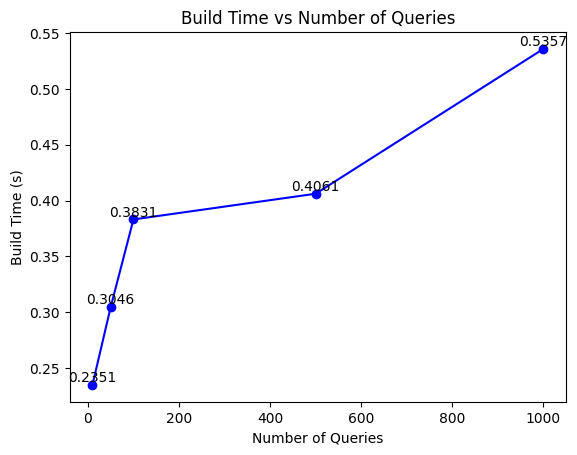

In [51]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
M = 16
ef_construction = 64

num_queries_list = [10, 50, 100, 500, 1000]  # Example number of queries to test
build_times = []

index = faiss.IndexHNSWFlat(d, M)
index.hnsw.efConstruction = ef_construction

for num_query in num_queries_list:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    index.add(wb)
    index.add(xq_subset)
    elapsed_time = time.time() - start_time

    build_times.append(elapsed_time)

# Display the table
print("Number of Queries  |  Build Time (s)")
print("-------------------------------------")
for num_query, build_time in zip(num_queries_list, build_times):
    print(f"{num_query:17d}  |  {build_time:.8f}")

# Plot the build times
plt.plot(num_queries_list, build_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Build Time (s)')
plt.title('Build Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries_list, build_times):
    plt.text(i, j, f'{j:.4f}', ha='center', va='bottom')

plt.show()


In [137]:
#4. IVF
xq = xq[:10].reshape(10, xq.shape[1])

nlist = 128
quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist)

index.train(wb)

index.add(wb)

%time D, I = index.search(xq, k)



CPU times: total: 31.2 ms
Wall time: 6.49 ms


In [76]:
np.in1d(baseline,I)

CPU times: total: 0 ns
Wall time: 6.99 ms


array([ True, False, False,  True,  True, False, False,  True, False,
        True])

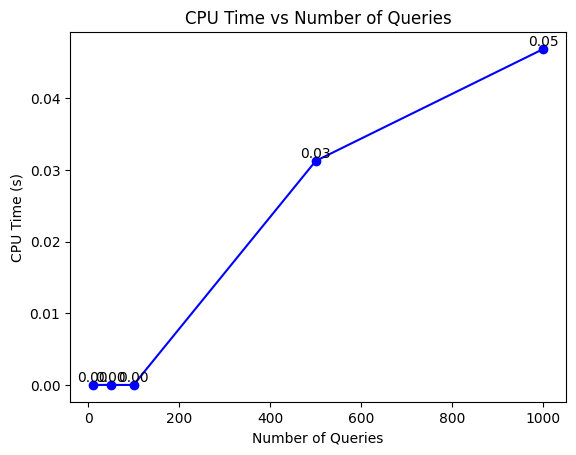

In [138]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nlist = 128

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist)

index.train(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
cpu_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])
    
    start_time = time.process_time()
    index.add(xq_subset)
    D, I = index.search(xq_subset, k)
    elapsed_time = time.process_time() - start_time
    
    cpu_times.append(elapsed_time)

plt.plot(num_queries, cpu_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('CPU Time (s)')
plt.title('CPU Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, cpu_times):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


Number of Queries  |  Wall Time (s)
------------------------------------
               10  |  0.0010
               50  |  0.0000
              100  |  0.0010
              500  |  0.0020
             1000  |  0.0030


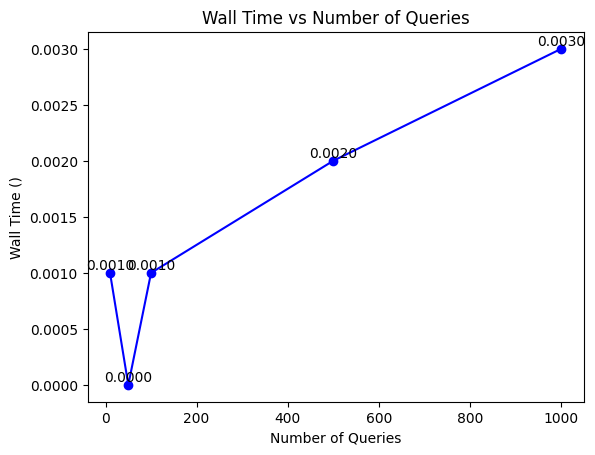

In [26]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nlist = 128

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist)

index.train(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
search_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    index.add(xq_subset)
    D, I = index.search(xq_subset, k)
    elapsed_time = (time.time() - start_time) 

    search_times.append(elapsed_time)

# Display the table
print("Number of Queries  |  Wall Time (s)")
print("------------------------------------")
for num_query, search_time in zip(num_queries, search_times):
    print(f"{num_query:17d}  |  {search_time:.4f}")

# Plot the wall time values
plt.plot(num_queries, search_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Wall Time ()')
plt.title('Wall Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, search_times):
    plt.text(i, j, f'{j:.4f}', ha='center', va='bottom')

plt.show()


Number of Queries  |  Queries per Second
----------------------------------------
               10  |  16498.44
               50  |  5441.99
              100  |  3028.15
              500  |  995.02
             1000  |  544.96


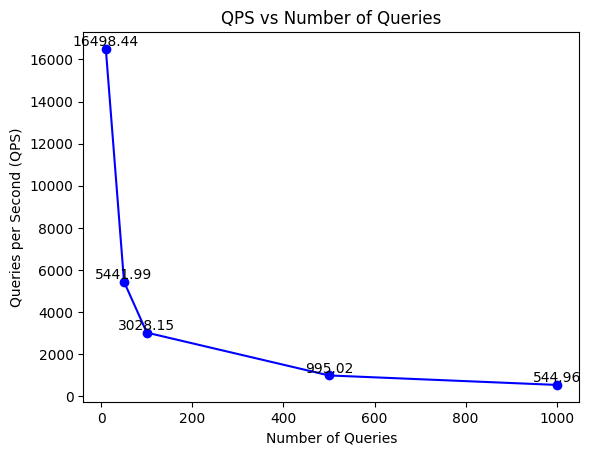

In [30]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nlist = 128

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist)

index.train(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
qps_list = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    query_count = 0

    while time.time() - start_time < 1.0:  # Measure QPS for 1 second
        D, I = index.search(xq_subset, k)
        query_count += 1

    qps = query_count / (time.time() - start_time)
    qps_list.append(qps)

# Display the table
print("Number of Queries  |  Queries per Second")
print("----------------------------------------")
for num_query, qps in zip(num_queries, qps_list):
    print(f"{num_query:17d}  |  {qps:.2f}")

# Plot the QPS values
plt.plot(num_queries, qps_list, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Queries per Second (QPS)')
plt.title('QPS vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, qps_list):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


Number of Queries  |  Build Time (s)
-------------------------------------
               10  |  0.04719448
               50  |  0.00000000
              100  |  0.00000000
              500  |  0.00099993
             1000  |  0.00000000


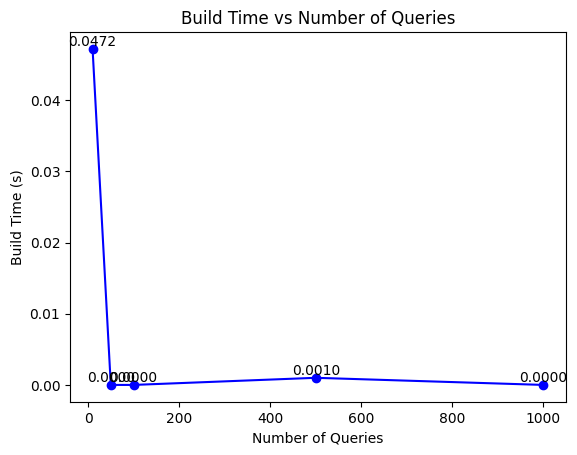

In [21]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nlist = 128

num_queries_list = [10, 50, 100, 500, 1000]  # Example number of queries to test
build_times = []

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist)

for num_query in num_queries_list:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    index.train(wb)
    index.add(xq_subset)
    elapsed_time = time.time() - start_time

    build_times.append(elapsed_time)

# Display the table
print("Number of Queries  |  Build Time (s)")
print("-------------------------------------")
for num_query, build_time in zip(num_queries_list, build_times):
    print(f"{num_query:17d}  |  {build_time:.8f}")

# Plot the build times
plt.plot(num_queries_list, build_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Build Time (s)')
plt.title('Build Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries_list, build_times):
    plt.text(i, j, f'{j:.4f}', ha='center', va='bottom')

plt.show()


In [43]:
import faiss
import time

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
nlist = 128

num_query = 1000  # Example number of queries to test

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist)

xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

start_time = time.time()  # Start measuring the build time
index.train(wb)
build_time = time.time() - start_time  # Calculate the elapsed build time

print("Build Time:", build_time)


Build Time: 0.05265069007873535


In [37]:
#xq = xq[:50].reshape(50, xq.shape[1])
xq = xq[0].reshape(1, xq.shape[1])
xq.shape

(1, 128)

In [161]:
#PQ

#IndexPQ

import faiss

D = wb.shape[1]
m = 8
assert D % m == 0
nbits = 8  # number of bits per subquantizer, k* = 2**nbits
index = faiss.IndexPQ(D, m, nbits)


In [162]:
index.is_trained


False

In [163]:
index.train(wb)  # PQ training can take some time when using large nbits

In [164]:
index.add(wb)

In [165]:
k = 100
dist, I = index.search(xq, k)


In [166]:
I.shape

(1, 100)

In [168]:
%%timeit
index.search(xq,k)

7.69 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [169]:
import os

def get_memory(index):
    # write index to file
    faiss.write_index(index, './temp.index')
    # get file size
    file_size = os.path.getsize('./temp.index')
    # delete saved index
    os.remove('./temp.index')
    return file_size

In [170]:
get_memory(index)

8131158

Number of Queries  |  Wall Time (s)
-----------------------------------
               10  |  0.0012
               50  |  0.0010
              100  |  0.0010
              500  |  0.0070
             1000  |  0.0120


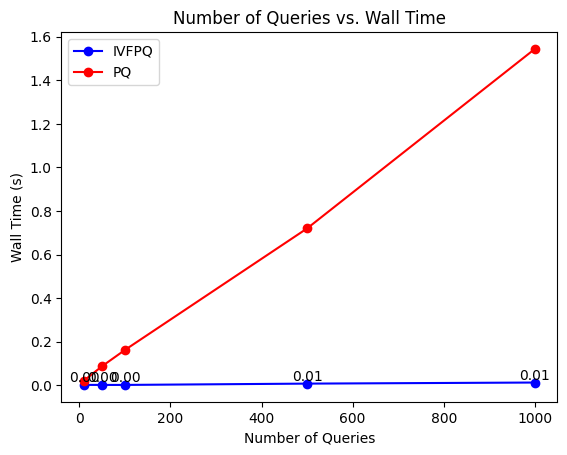

In [184]:
#IndexPQ

import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # Dimensionality of the vectors
k = 10  # Number of nearest neighbors to return
nlist = 128

quantizer = faiss.IndexFlatIP(d)
index_ivfpq = faiss.IndexIVFPQ(quantizer, d, nlist, m, nbits)
index_ivfpq.train(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
search_times_ivfpq = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    index_ivfpq.add(xq_subset)
    D, I = index_ivfpq.search(xq_subset, k)
    elapsed_time = time.time() - start_time

    search_times_ivfpq.append(elapsed_time)

# Display the results as a table
print("Number of Queries  |  Wall Time (s)")
print("-----------------------------------")
for num_query, search_time in zip(num_queries, search_times_ivfpq):
    print(f"{num_query:17d}  |  {search_time:.4f}")

# Plot the wall time values
plt.plot(num_queries, search_times_ivfpq, marker='o', linestyle='-', color='b', label='IVFPQ')
plt.xlabel('Number of Queries')
plt.ylabel('Wall Time (s)')
plt.title('Number of Queries vs. Wall Time')
plt.legend()

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, search_times_ivfpq):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

# Additional code for PQ index
D = wb.shape[1]
m = 8
assert D % m == 0
nbits = 8  # number of bits per subquantizer, k* = 2**nbits
index_pq = faiss.IndexPQ(D, m, nbits)
index_pq.train(wb)  # PQ training can take some time when using large nbits
index_pq.add(wb)

search_times_pq = []
for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    index_pq.add(xq_subset)
    D, I = index_pq.search(xq_subset, k)
    elapsed_time = time.time() - start_time

    search_times_pq.append(elapsed_time)

# Plot the wall time values for PQ index
plt.plot(num_queries, search_times_pq, marker='o', linestyle='-', color='r', label='PQ')
plt.legend()

plt.show()


Number of Queries  |  Wall Time (s)
-----------------------------------
               10  |  0.0189
               50  |  0.0743
              100  |  0.1356
              500  |  0.7184
             1000  |  1.4156


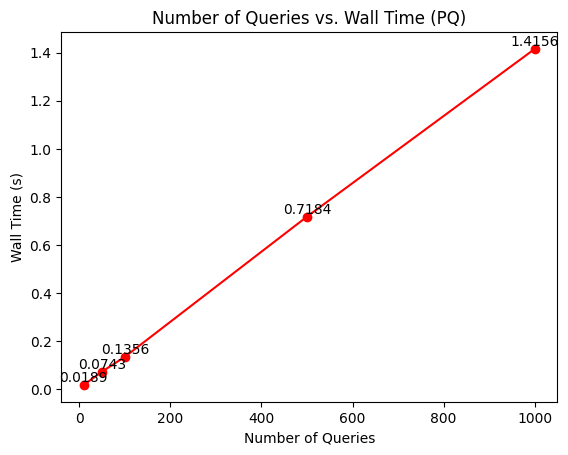

In [186]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
xq = read_fvecs('./sift/sift_query.fvecs')

D = wb.shape[1]
m = 8
assert D % m == 0
nbits = 8  # number of bits per subquantizer, k* = 2**nbits
index_pq = faiss.IndexPQ(D, m, nbits)
index_pq.train(wb)
index_pq.add(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
search_times_pq = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    index_pq.add(xq_subset)
    D, I = index_pq.search(xq_subset, k)
    elapsed_time = time.time() - start_time

    search_times_pq.append(elapsed_time)

# Display the table
print("Number of Queries  |  Wall Time (s)")
print("-----------------------------------")
for num_query, search_time in zip(num_queries, search_times_pq):
    print(f"{num_query:17d}  |  {search_time:.4f}")

# Plot the wall time values for PQ index
plt.plot(num_queries, search_times_pq, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Queries')
plt.ylabel('Wall Time (s)')
plt.title('Number of Queries vs. Wall Time (PQ)')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, search_times_pq):
    plt.text(i, j, f'{j:.4f}', ha='center', va='bottom')

plt.show()


In [172]:
#IndexIVFPQ
vecs = faiss.IndexFlatL2(D)

nlist = 2048  # how many Voronoi cells (must be >= k* which is 2**nbits)
nbits = 8  # when using IVF+PQ, higher nbits values are not supported
index = faiss.IndexIVFPQ(vecs, D, nlist, m, nbits)
print(f"{2**nbits=}")  # our value for nlist

2**nbits=256


In [173]:
index.train(wb)

In [174]:
index.add(wb)

In [175]:
dist, I = index.search(xq, k)

In [176]:
%%timeit
index.search(xq, k)

88.6 µs ± 852 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Number of Queries  |  Wall Time (s)
-----------------------------------
               10  |  0.0010
               50  |  0.0020
              100  |  0.0040
              500  |  0.0120
             1000  |  0.0170


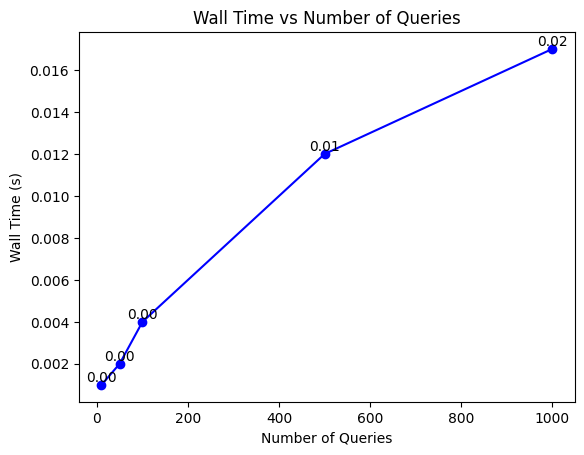

In [55]:
#IndexIVFPQ

import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]

xq = read_fvecs('./sift/sift_query.fvecs')
D = wb.shape[1]
m = 8
assert D % m == 0
nbits = 8  # when using IVF+PQ, higher nbits values are not supported
d = 128  # Dimensionality of the vectors
k = 10  # Number of nearest neighbors to return
nlist = 128

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFPQ(quantizer, d, nlist, m, nbits)

index.train(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
search_times = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    index.add(xq_subset)
    D, I = index.search(xq_subset, k)
    elapsed_time = time.time() - start_time

    search_times.append(elapsed_time)

# Display the results as a table
print("Number of Queries  |  Wall Time (s)")
print("-----------------------------------")
for num_query, search_time in zip(num_queries, search_times):
    print(f"{num_query:17d}  |  {search_time:.4f}")

# Plot the wall time values
plt.plot(num_queries, search_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Wall Time (s)')
plt.title('Wall Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, search_times):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


Number of Queries  |  Queries per Second
----------------------------------------
               10  |  15668.99
               50  |  4544.32
              100  |  2541.89
              500  |  924.89
             1000  |  531.54


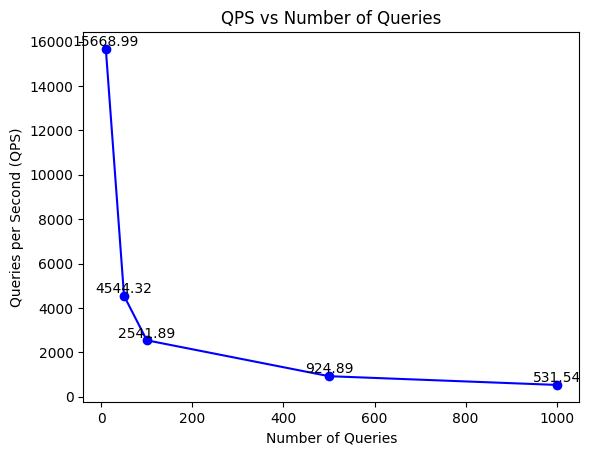

In [57]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nlist = 128
m = 8
nbits = 8

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFPQ(quantizer, d, nlist, m, nbits)

index.train(wb)

num_queries = [10, 50, 100, 500, 1000]  # Example number of queries to test
qps_list = []

for num_query in num_queries:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    query_count = 0

    while time.time() - start_time < 1.0:  # Measure QPS for 1 second
        D, I = index.search(xq_subset, k)
        query_count += 1

    qps = query_count / (time.time() - start_time)
    qps_list.append(qps)

# Display the table
print("Number of Queries  |  Queries per Second")
print("----------------------------------------")
for num_query, qps in zip(num_queries, qps_list):
    print(f"{num_query:17d}  |  {qps:.2f}")

# Plot the QPS values
plt.plot(num_queries, qps_list, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Queries per Second (QPS)')
plt.title('QPS vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries, qps_list):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

plt.show()


Number of Queries  |  Build Time (s)
-------------------------------------
               10  |  1.89857817
               50  |  1.54708004
              100  |  1.62909126
              500  |  1.70566010
             1000  |  1.62196040


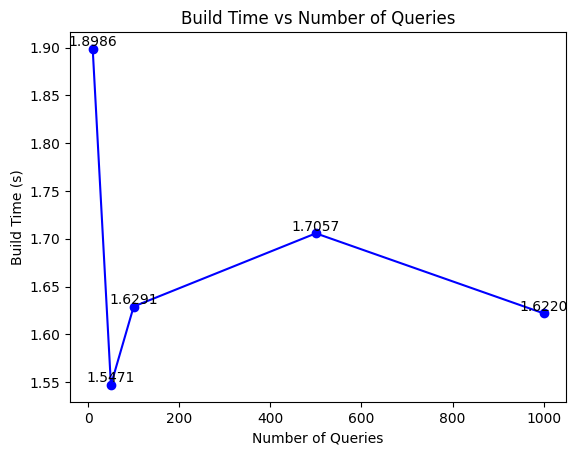

In [66]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nlist = 128
m = 8
nbits = 8

num_queries_list = [10, 50, 100, 500, 1000]  # Example number of queries to test
build_times = []

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFPQ(quantizer, d, nlist, m, nbits)

for num_query in num_queries_list:
    xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

    start_time = time.time()
    index.train(wb)
    index.add(xq_subset)
    elapsed_time = time.time() - start_time

    build_times.append(elapsed_time)

# Display the table
print("Number of Queries  |  Build Time (s)")
print("-------------------------------------")
for num_query, build_time in zip(num_queries_list, build_times):
    print(f"{num_query:17d}  |  {build_time:.8f}")

# Plot the build times
plt.plot(num_queries_list, build_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Build Time (s)')
plt.title('Build Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries_list, build_times):
    plt.text(i, j, f'{j:.4f}', ha='center', va='bottom')

plt.show()


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Number of Queries  |  Average Build Time (s)
--------------------------------------------
               10  |  1.87731495
               50  |  1.79474878
              100  |  1.81798205
              500  |  1.96913161
             1000  |  1.89209056


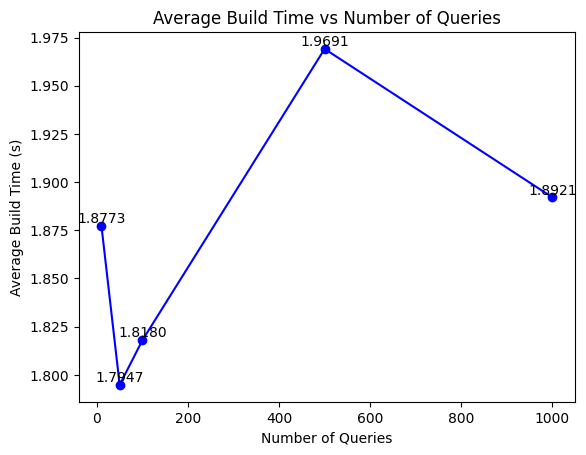

In [67]:
import faiss
import time
import matplotlib.pyplot as plt

# Assuming read_fvecs returns a NumPy array
wb = read_fvecs('./sift/sift_base.fvecs')  # 1M samples
wb = wb[:10000]
xq = read_fvecs('./sift/sift_query.fvecs')

d = 128  # dimensionality of Sift1M data
k = 10  # number of nearest neighbors to return
nlist = 128
m = 8
nbits = 8

num_queries_list = [10, 50, 100, 500, 1000]  # Example number of queries to test
num_epochs = 5  # Number of epochs to run
build_times = []

quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFPQ(quantizer, d, nlist, m, nbits)

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    epoch_build_times = []

    for num_query in num_queries_list:
        xq_subset = xq[:num_query].reshape(num_query, xq.shape[1])

        start_time = time.time()
        index.train(wb)
        index.add(xq_subset)
        elapsed_time = time.time() - start_time

        epoch_build_times.append(elapsed_time)

    build_times.append(epoch_build_times)

# Average the build times over epochs
average_build_times = [sum(times) / num_epochs for times in zip(*build_times)]

# Display the table
print("Number of Queries  |  Average Build Time (s)")
print("--------------------------------------------")
for num_query, average_time in zip(num_queries_list, average_build_times):
    print(f"{num_query:17d}  |  {average_time:.8f}")

# Plot the average build times
plt.plot(num_queries_list, average_build_times, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Queries')
plt.ylabel('Average Build Time (s)')
plt.title('Average Build Time vs Number of Queries')

# Annotate each data point with its corresponding value
for i, j in zip(num_queries_list, average_build_times):
    plt.text(i, j, f'{j:.4f}', ha='center', va='bottom')

plt.show()
